## **#1 Import Libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc )

import warnings
warnings.filterwarnings('ignore')

## **#2 Load Dataset**

In [2]:
dataset_url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv'
df = pd.read_csv(dataset_url)

## **#3 Preprocessing**

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
# Show the percentage of missing vlaues for each feature.
df.isna().mean().round(4) * 100
#msno.bar(df)

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

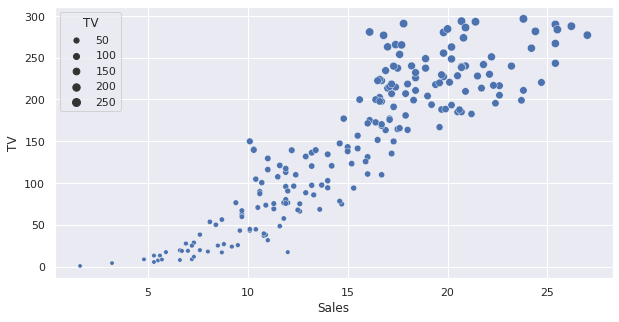

In [6]:
# Visualize the relationship between the amount spent on advertising on [TV] and units sold.
sns.set(rc = {'figure.figsize':(10,5)})

sns.scatterplot(data=df, x="Sales", y="TV", size='TV')
plt.show()

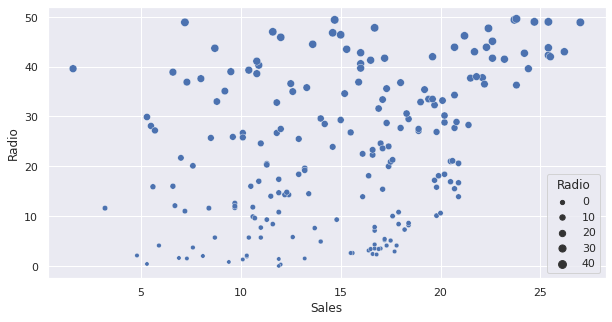

In [7]:
# Visualize the relationship between the amount spent on advertising on [Radio] and units sold.
sns.scatterplot(data=df, x="Sales", y="Radio", size='Radio')
plt.show()

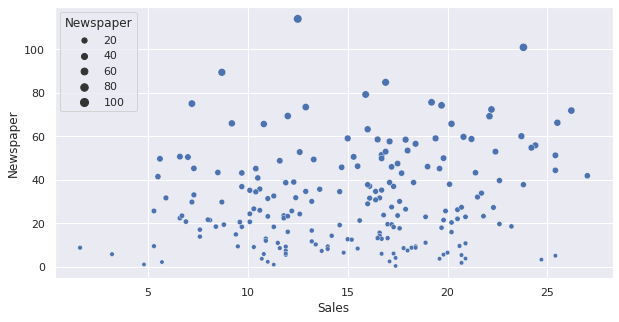

In [8]:
# Visualize the relationship between the amount spent on advertising on [Newspaper] and units sold.
sns.scatterplot(data=df, x="Sales", y="Newspaper", size='Newspaper')
plt.show()

In [9]:
# The correlation confirms the strong relation between the amount spent on tv advertisng and the amount of untis sold.
correlation = df.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
# Split the data into X = independent variables, y = depndent variable.
X = df.drop('Sales', axis=1)
y = df['Sales']

## **#4 Evaluation**

In [12]:
# Model evaluation using the Linear Regression classifier.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()#KNeighborsRegressor(n_neighbors=11)#RandomForestRegressor()#DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9059011844150826


In [13]:
#                      TV,   Radio,  Newspaper
features = np.array([[230.1, 37.8,    69.2]])
print(model.predict(features))

[21.37254028]


In [14]:
# Let's expremint and see what the model will predict when using only 1 way of advertising for each feature.
#                      TV,   Radio,  Newspaper
features = np.array([[200, 0,    0]])
print(model.predict(features), '\n')

#                      TV,   Radio,  Newspaper
features = np.array([[0, 200,    0]])
print(model.predict(features), '\n')

#                      TV,   Radio,  Newspaper
features = np.array([[0, 0,    200]])
print(model.predict(features), '\n')

[15.61598057] 

[24.90319888] 

[5.58145577] 

